In [1]:
#General imports
resol = 300
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "axes.linewidth": 0.7,
    "xtick.major.width": 0.6,
    "ytick.major.width": 0.6,
})

import sys
import numpy as np
from pathlib import Path
pi = np.pi

project_root = Path().resolve().parents[0]
sys.path.append(str(project_root))

#Local imports
from scripts_experiments.reflection_convergence_vs_n import run_reflection_vs_n

<h2> Execute the experiment </h2>

In [2]:
#Physical parameters
omega_A = 10*pi
Gamma = 5*pi

#Different photon frequencies
omega_q_tab = [9*pi, 10*pi]

#Incoming photons
index_omega_q = 1
omega_q = omega_q_tab[index_omega_q-1]
delta_q = 0.05*pi


#Different frequency windows
frequency_windows = [(0*pi, 16*pi),
                     (0*pi, 18*pi),
                     (0*pi, 20*pi),
                     (0*pi, 22*pi),
                     (0*pi, 24*pi),
                     (7*pi, 17*pi),
                     (6*pi, 16*pi),
                     (5*pi, 15*pi),
                     (4*pi, 14*pi),
                     (3*pi, 13*pi),
                     (4*pi, 16*pi),
                     (4*pi, 18*pi),
                     (4*pi, 20*pi),
                     (4*pi, 22*pi),
                     (4*pi, 24*pi)]


#Values of n for the precision on the bare parameters
n_tab = [0,1,2,3,4,5,6,7,8,9,10]

#Parameters of the simulation
L = 50

param_cavity_physical = {'omega_A': omega_A, 'Gamma': Gamma, 'L': L}

param_time_evol = {'T': L/2, 'dt': 0.01}

param_photon = {'omega_p': omega_q, 'delta_k': delta_q, 'x_0': -L/4}

Run the experiment

In [3]:
#Run the experiment for different frequency windows
for i in range(len(frequency_windows)):
    index_experiment = i+1
    ir = frequency_windows[i][0]
    uv = frequency_windows[i][1]

    cutoffs = {'ir_cutoff': ir , 'uv_cutoff': uv}

    print(f'Treating window : {index_experiment} / {len(frequency_windows)}')

    run_reflection_vs_n(param_photon, param_cavity_physical, param_time_evol, cutoffs, n_tab,
                         index_omega_q, index_experiment, store_results=True, progress=True)
    print('---------------------')

Treating window : 1 / 15


100%|██████████| 11/11 [00:02<00:00,  3.77it/s]


---------------------
Treating window : 2 / 15


100%|██████████| 11/11 [00:03<00:00,  3.28it/s]


---------------------
Treating window : 3 / 15


100%|██████████| 11/11 [00:03<00:00,  3.31it/s]


---------------------
Treating window : 4 / 15


100%|██████████| 11/11 [00:03<00:00,  3.21it/s]


---------------------
Treating window : 5 / 15


100%|██████████| 11/11 [00:03<00:00,  3.00it/s]


---------------------
Treating window : 6 / 15


100%|██████████| 11/11 [00:02<00:00,  4.64it/s]


---------------------
Treating window : 7 / 15


100%|██████████| 11/11 [00:02<00:00,  4.63it/s]


---------------------
Treating window : 8 / 15


100%|██████████| 11/11 [00:02<00:00,  4.69it/s]


---------------------
Treating window : 9 / 15


100%|██████████| 11/11 [00:02<00:00,  4.61it/s]


---------------------
Treating window : 10 / 15


100%|██████████| 11/11 [00:02<00:00,  4.63it/s]


---------------------
Treating window : 11 / 15


100%|██████████| 11/11 [00:02<00:00,  4.33it/s]


---------------------
Treating window : 12 / 15


100%|██████████| 11/11 [00:02<00:00,  4.03it/s]


---------------------
Treating window : 13 / 15


100%|██████████| 11/11 [00:02<00:00,  3.81it/s]


---------------------
Treating window : 14 / 15


100%|██████████| 11/11 [00:03<00:00,  3.62it/s]


---------------------
Treating window : 15 / 15


100%|██████████| 11/11 [00:03<00:00,  3.41it/s]

---------------------


<h1> Results </h1>

In [4]:
index_omega_q = 1
coincidence_to_plot = []

for i in range(len(frequency_windows)):
    index_experiment = i+1
    data_file = f"../results/csv_files/coincidence_vs_n_omega_{index_omega_q}_window_{index_experiment}.csv"
    df = pd.read_csv(data_file)
    coincidence_to_plot.append(df['reflection_tab'].to_numpy())


#theoretical value
omega_A = 10*pi
Gamma = 5*pi

#Theoretical value
R_theory_physical = 1 / (1 + ((omega_q_tab[index_omega_q-1] - omega_A)/ (Gamma/2))**2)
theoretical_val = R_theory_physical

Create the figure

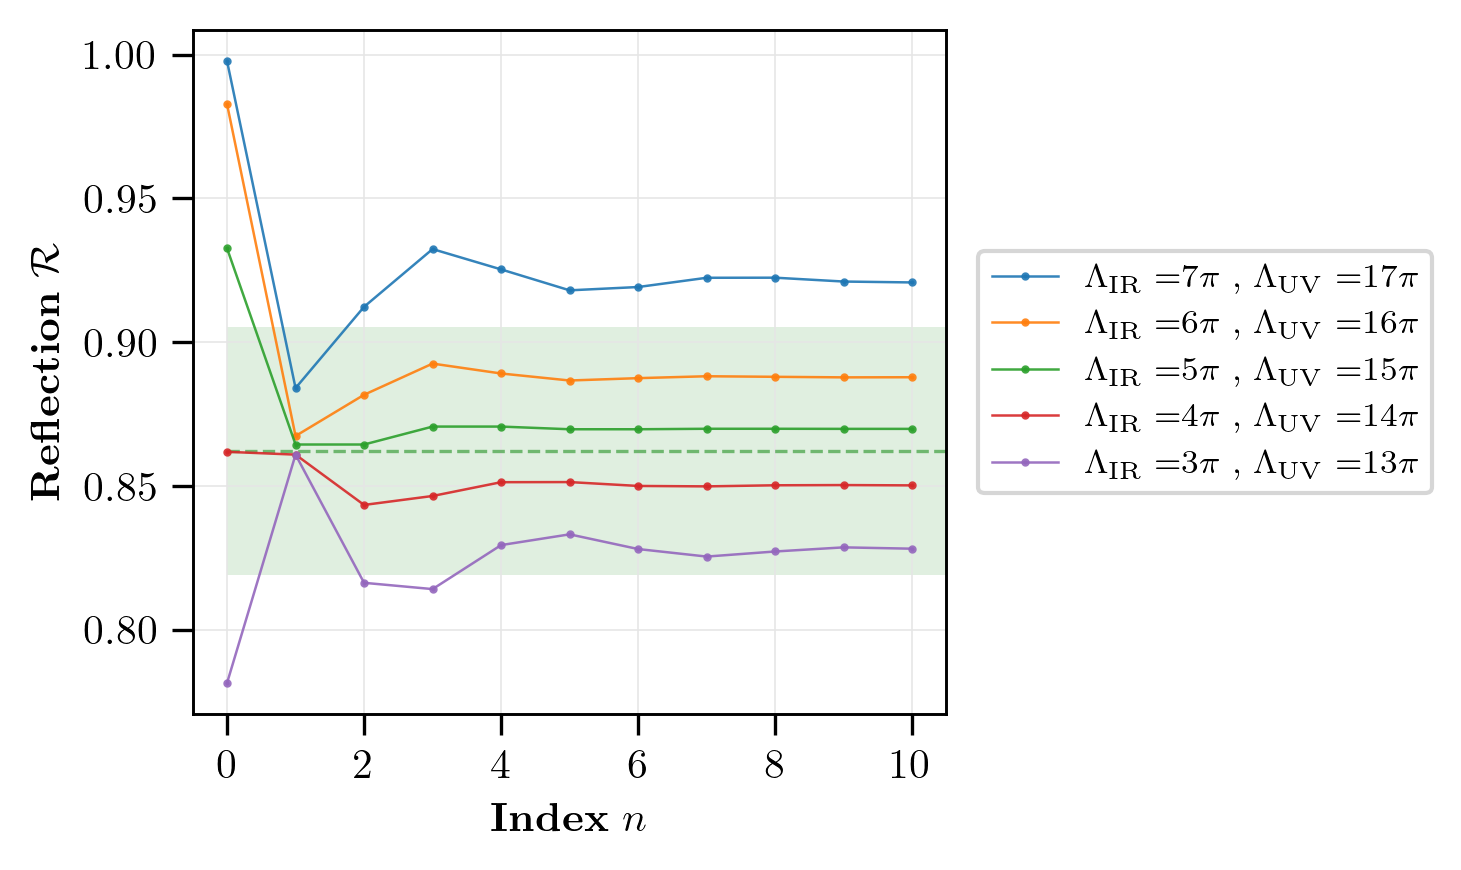

In [5]:
# Figure setup (même ADN que ta figure de référence)
fig, ax = plt.subplots(figsize=(5, 3), dpi=300)

for i in range(len(frequency_windows)-10, len(frequency_windows)-5):
    ax.plot(n_tab, coincidence_to_plot[i], 
            marker="o", 
            label = r'$\Lambda_{\rm IR}=$' + f'{round(frequency_windows[i][0]/pi)}$\\pi$ , ' + r'$\Lambda_{\rm UV}=$' + f'{round(frequency_windows[i][1]/pi)}$\\pi$',
            markersize=1,
            linewidth=0.6,
            alpha=0.9,
            zorder=3
        )

#5% confidence region
ax.hlines(theoretical_val, 0, 1000,color='green', alpha=0.5, linewidth=0.8, linestyle='--')
ax.fill_between(np.linspace(0, 1000, 100),
                0.95*theoretical_val,
                1.05*theoretical_val,color='green',alpha=0.12,linewidth=0, zorder=1)

ax.set_xlim([n_tab[0] - 0.5, n_tab[-1] + 0.5])
#ax.set_ylim([0.8*theoretical_val,1.2*theoretical_val])

#legend outside the plot
ax.legend(
    prop={'size': 8},
    frameon=True,
    loc='center left',
    bbox_to_anchor=(1.02, 0.5)
)


# Labels
ax.set_xlabel(r'\textbf{Index} $n$', fontsize=13)
ax.set_ylabel(r'\textbf{Reflection} $\mathcal{R}$', fontsize=13)

#grid
ax.grid(color='0.9', linestyle='-', linewidth=0.4)

# Tick appearance
ax.tick_params(axis='both', which='major', length=5, width=0.8)
ax.tick_params(axis='both', which='minor', length=3, width=0.6)

#font size
for item in [ax.xaxis.label, ax.yaxis.label]:
    item.set_fontsize(10)

for item in (ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(10)

plt.tight_layout()
#plt.savefig(f'../results/fig/coincidence_vs_n_ir{int(ir_tab[0]/pi)}_{index_omega_q}.pdf')
plt.show()